<a class="anchor" id="0.1"></a>
## Table of Contents
[About the dataset](#z)

[Objective](#y)
1.  [Import Libraries](#1)
1.  [Import Data](#2)
1.  [Cleaning](#3)
1.  [Exploratory Data Analysis](#4)
   *   [Outcome](#a)
   *   [Pregnancies](#b)
   *   [Glucose](#c)
   *   [Blood Pressure](#d)
   *   [Skin Thickness](#e)
   *   [Insulin](#f)
   *   [BMI](#g)
   *   [Diabetes Pedigree Function](#h)
   *   [Age](#i)
   *   [Correlation Plot](#j)
   *   [Pairplot](#k)
   *   [Box Plot](#l)
   
1.  [Modeling](#5)
   *   [Logistic Regression](#m)
   *   [Random Forest](#n)
   *   [AdaBoost Classifier](#o)
1.  [Model Comparison and Conclusion](#6)
*******************

### About the dataset:<a class="anchor" id="z"></a>
[Back to Table of Contents](#0.1)
    
   The data was collected and made available by “National Institute of Diabetes and Digestive and Kidney Diseases” as part of the Pima Indians Diabetes Database. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here belong to the Pima Indian heritage (subgroup of Native Americans), and are females of ages 21 and above.
>   
 The following features have been provided to help us predict whether a person is diabetic or not:
>   * Pregnancies: Number of times pregnant
>   * Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
>   * BloodPressure: Diastolic blood pressure (mm Hg)
>   * SkinThickness: Triceps skin fold thickness (mm)
>   * Insulin: 2-Hour serum insulin (mu U/ml)
>   * BMI: Body mass index (weight in kg/(height in m)2)
>   * DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history)
>   * Age: Age (years)
>   * Outcome: Class variable (0 if non-diabetic, 1 if diabetic)    

### Objective<a class="anchor" id="y"></a>
[Back to Table of Contents](#0.1)

>  The objective of the dataset is **to diagnostically predict whether or not a patient has diabetes**, based on certain diagnostic measurements included in the dataset.

## 1. Import Libraries<a class="anchor" id="1"></a>
[Back to Table of Contents](#0.1)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## 2. Import Data<a class="anchor" id="2"></a>
[Back to Table of Contents](#0.1)

In [3]:
df = pd.read_csv(r"Pima Indians Diabetes Dataset.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 3. Cleaning<a class="anchor" id="3"></a>
[Back to Table of Contents](#0.1)

In [6]:
df.rename(columns={'DiabetesPedigreeFunction':"DPF", 'BloodPressure':'BP'}, inplace=True)

In [7]:
df.describe()

,Pregnancies,Glucose,BP,SkinThickness,Insulin,BMI,DPF,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


     Here, we can see that columns:
     Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin and BMI is 0, which is impossible.
      --> Will replace the zeros with NaN and then with univariate analysis, will again replace these values.

In [8]:
list(df.columns)

['Pregnancies',
 'Glucose',
 'BP',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DPF',
 'Age',
 'Outcome']

In [9]:
cols = ['Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI']

for i in cols:
    df[i] = np.where(df[i] == 0, np.nan, df[i])

Pregnancies        0
Glucose            5
BP                35
SkinThickness    227
Insulin          374
BMI               11
DPF                0
Age                0
Outcome            0
dtype: int64


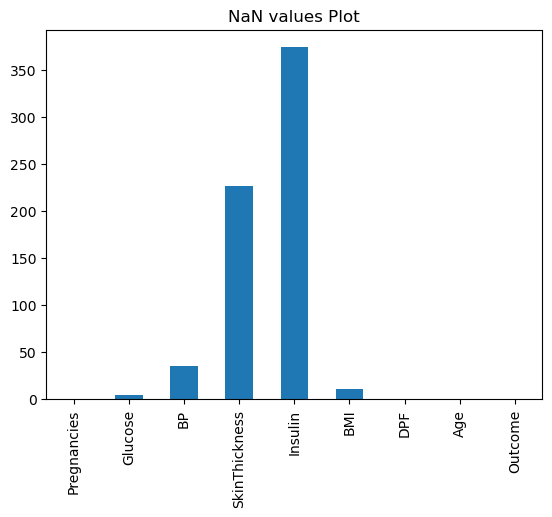

In [10]:
#df.isnull().sum()
print(df.isnull().sum())
df.isnull().sum().plot(kind = "bar")
plt.title("NaN values Plot")
plt.show()

## 4. Exploratory Data Analysis<a class="anchor" id="4"></a>
[Back to Table of Contents](#0.1)

In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cat_cols: 1
num_cols: 8
cat_but_car: 0
num_but_cat: 1


   Outcome      Ratio
0      500  65.104167
1      268  34.895833


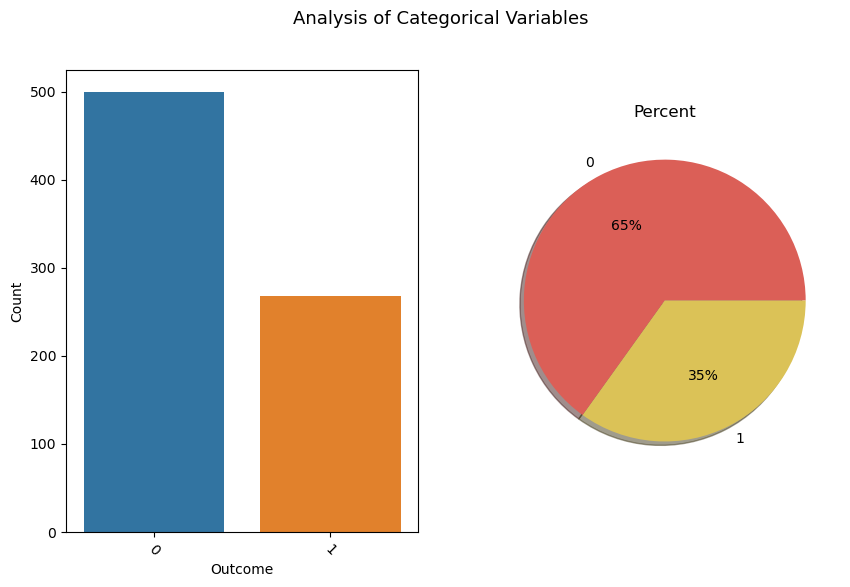

In [12]:
def cat_summary(dataframe, col_name, plot=False):

    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))

    if plot:
        fig, ax = plt.subplots(1, 2)
        ax = np.reshape(ax, (1, 2))
        ax[0, 0] = sns.countplot(x=dataframe[col_name],  ax=ax[0, 0])
        ax[0, 0].set_ylabel('Count')
        ax[0, 0].set_xticklabels(ax[0, 0].get_xticklabels(), rotation=-45)
        ax[0, 1] = plt.pie(dataframe[col_name].value_counts().values, labels=dataframe[col_name].value_counts().keys(),
                           colors=sns.color_palette('hls',8), shadow=True, autopct='%.0f%%')
        plt.title("Percent")
        fig.set_size_inches(10, 6)
        fig.suptitle('Analysis of Categorical Variables', fontsize=13)
        
        plt.show()


for col in cat_cols:
    cat_summary(df, col, plot=True)

### a. Outcomes<a class="anchor" id="a"></a>
[Back to Table of Contents](#0.1)

Diabetic: 34.89583333333333%
Non-Diabetic: 65.10416666666666%




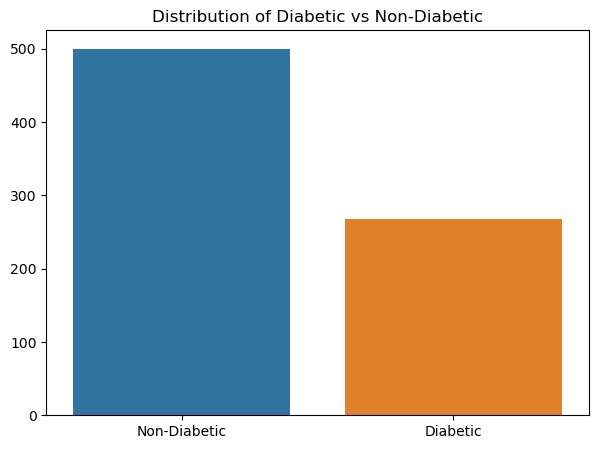

In [13]:
outcome_count = df['Outcome'].value_counts()
oc_cols = ['Non-Diabetic', 'Diabetic']
oc_counts = [outcome_count[0],outcome_count[1]]

non_diabetic = (oc_counts[0] / sum(oc_counts))*100
diabetic = (oc_counts[1] / sum(oc_counts))*100

print(f"Diabetic: {diabetic}%")
print(f"Non-Diabetic: {non_diabetic}%")

print("\n")

plt.figure(figsize=(7,5))
sns.barplot(x=oc_cols, y=oc_counts)
plt.title("Distribution of Diabetic vs Non-Diabetic")
plt.show()

### b. Pregnancies<a class="anchor" id="b"></a>
[Back to Table of Contents](#0.1)

In [14]:
print("Nummber of unique values in Pregnancies: ", len(df.Pregnancies.unique()))
print("Unique values in Pregnancies:", df.Pregnancies.unique())

Nummber of unique values in Pregnancies:  17
Unique values in Pregnancies: [ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]


In [15]:
pd.crosstab(df['Pregnancies'], df['Outcome']).T

Pregnancies,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17
Outcome,,,,,,,,,,,,,,,,,
0,73,106,84,48,45,36,34,20,16,10,14,4,5,5,0,0,0
1,38,29,19,27,23,21,16,25,22,18,10,7,4,5,2,1,1


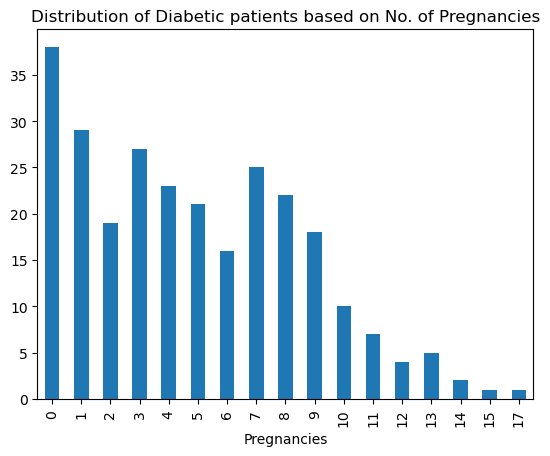

In [16]:
df.groupby(by="Pregnancies")["Outcome"].sum().plot(kind = "bar")
plt.title("Distribution of Diabetic patients based on No. of Pregnancies")
plt.show()

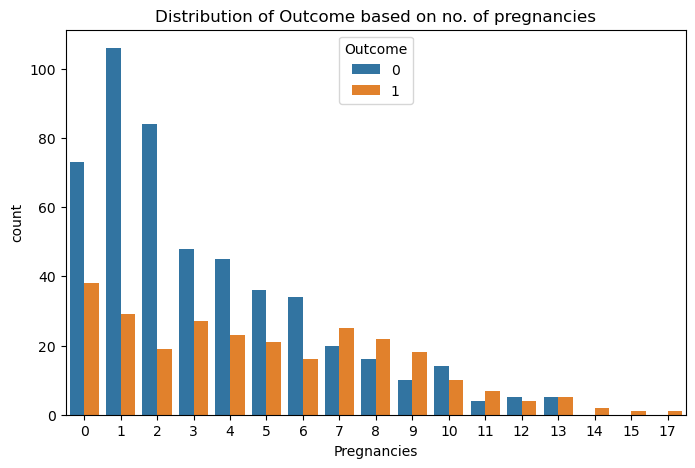

In [17]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pregnancies', data=df, hue='Outcome')
plt.title("Distribution of Outcome based on no. of pregnancies")
plt.show()

*  Patients with less number of pregnancies are more prone to diabetes.

or
*  After pregnancy, people are more likely to have diabetes.

### c. Glucose<a class="anchor" id="c"></a>
[Back to Table of Contents](#0.1)

C:\Users\Priyanka Pai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


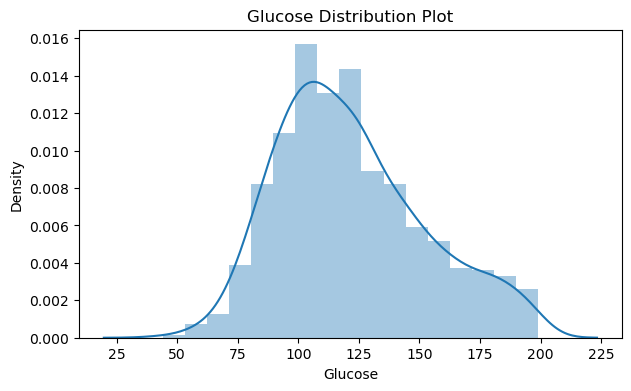

In [18]:
plt.figure(figsize=(7,4))
sns.distplot(df['Glucose'])
plt.title("Glucose Distribution Plot")
plt.show()

In [19]:
df.Glucose.isnull().sum()

5

There are **5 missing data points** in the Glucose column. From the above distribution, we can observe that there is not much skewness present in the data. So, replace the missing values with the **mean** of the data.

In [20]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace=True)
df['Glucose'].isnull().sum()

0

C:\Users\Priyanka Pai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


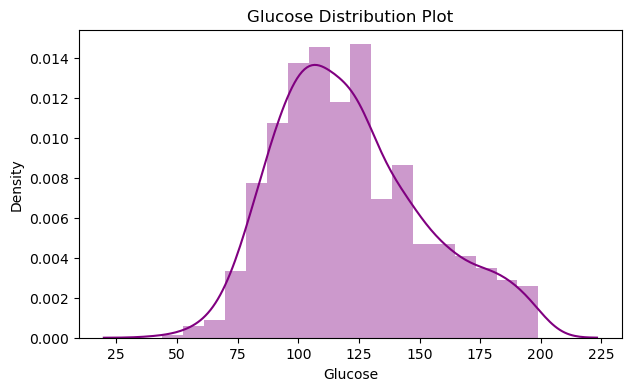

In [21]:
plt.figure(figsize=(7,4))
sns.distplot(df['Glucose'], color='Purple')
plt.title("Glucose Distribution Plot")
plt.show()

        Glucose_Cat      Ratio
Normal          571  74.348958
IGT             197  25.651042


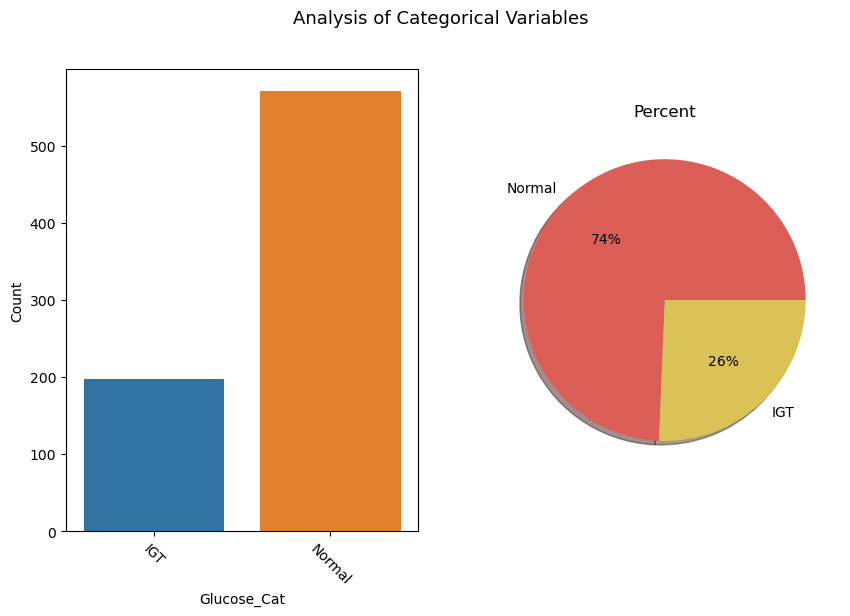

In [22]:
df["Glucose_Cat"] = df["Glucose"].apply(lambda x: "Normal" if x < 140 else ("IGT" if 140 <= x <= 200 else "DM"))
cat_summary(df,"Glucose_Cat", plot=True)

> * Normal = below 140
> * IGT - Impaired Glucose Tolerance = between 140 and 199
> * DM - Diabetes Mellitus = above 200


> None of the women have a glucose level above 200mg/dL and 74% of them have normal blood glucose level.

### d. Blood Pressure<a class="anchor" id="d"></a>
[Back to Table of Contents](#0.1)

C:\Users\Priyanka Pai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


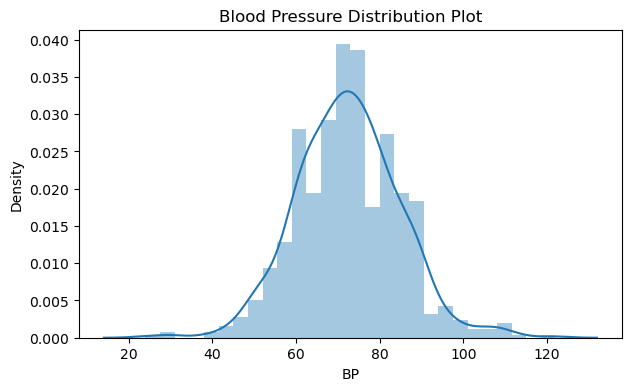

In [23]:
plt.figure(figsize=(7,4))
sns.distplot(df['BP'])
plt.title("Blood Pressure Distribution Plot")
plt.show()

In [24]:
df.BP.isnull().sum()

35

There are **35 missing data points** in the BP column. From the above distribution, we can observe that there is not much skewness present in the data. So, replace the missing values with the **mean** of the data.

In [25]:
df['BP'].fillna(df['BP'].mean(), inplace=True)
df['BP'].isnull().sum()

0

C:\Users\Priyanka Pai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


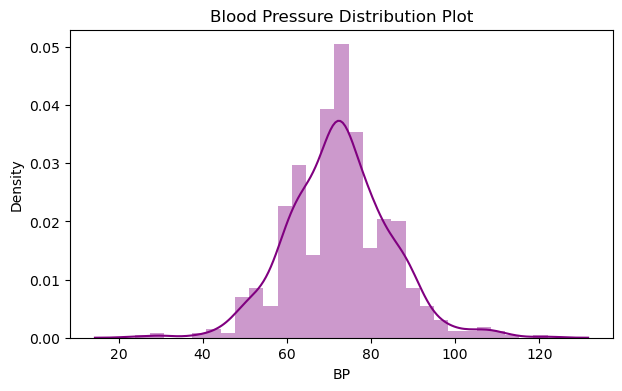

In [26]:
plt.figure(figsize=(7,4))
sns.distplot(df['BP'], color='Purple')
plt.title("Blood Pressure Distribution Plot")
plt.show()

                      Blood_Pressure_Cat      Ratio
optimal                              603  78.515625
high_normal                           68   8.854167
normal                                59   7.682292
grade_1_hypertension                  25   3.255208
grade_2_hypertension                  11   1.432292
grade_3_hypertension                   2   0.260417


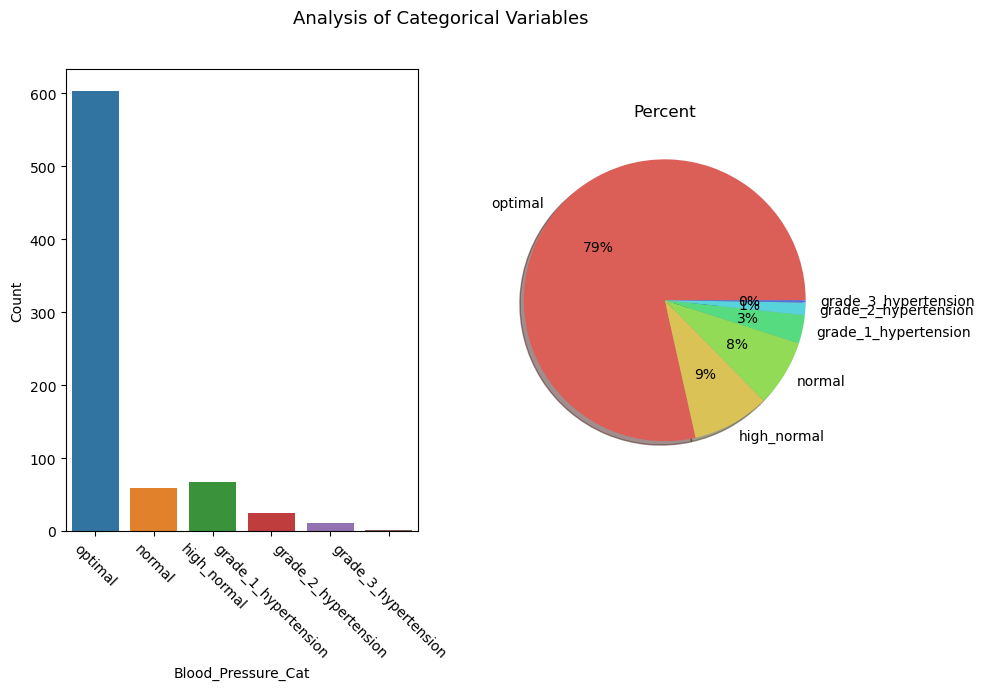

In [27]:
bp_labels = ["optimal", "normal", "high_normal", "grade_1_hypertension", "grade_2_hypertension", "grade_3_hypertension"]
df['Blood_Pressure_Cat'] = pd.cut(df['BP'], [-1, 80,  85, 90, 100, 110, df['BP'].max()], labels=bp_labels)
cat_summary(df,"Blood_Pressure_Cat", plot=True)

### e. Skin Thickness<a class="anchor" id="e"></a>
[Back to Table of Contents](#0.1)

C:\Users\Priyanka Pai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


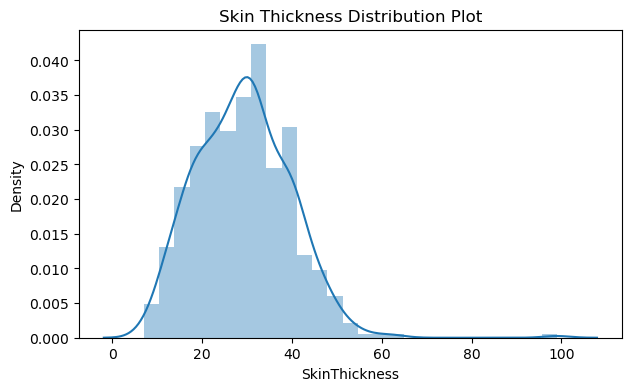

In [28]:
plt.figure(figsize=(7,4))
sns.distplot(df['SkinThickness'])
plt.title("Skin Thickness Distribution Plot")
plt.show()

In [29]:
df.SkinThickness.isnull().sum()

227

There are **227 missing data points** in the SkinThickness column. From the distribution plot we can observe that the SkinThickness data **right skewed**. So, replace the missing values with **median** of the data

In [30]:
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace=True)
df['SkinThickness'].isnull().sum()

0

C:\Users\Priyanka Pai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


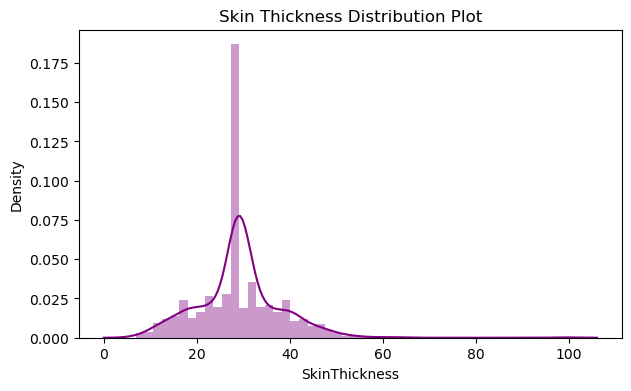

In [31]:
plt.figure(figsize=(7,4))
sns.distplot(df['SkinThickness'], color='Purple')
plt.title("Skin Thickness Distribution Plot")
plt.show()

### f. Insulin<a class="anchor" id="f"></a>
[Back to Table of Contents](#0.1)

C:\Users\Priyanka Pai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


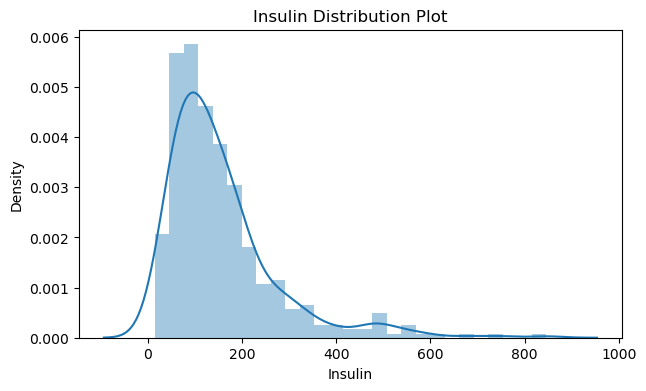

In [32]:
plt.figure(figsize=(7,4))
sns.distplot(df['Insulin'])
plt.title("Insulin Distribution Plot")
plt.show()

In [33]:
df.Insulin.isnull().sum()

374

There are **374 missing data points** in the Insulin column. From the distribution plot we can observe that the Insulin data **right skewed**. So, replace the missing values with **median** of the data

In [34]:
df['Insulin'].fillna(df['Insulin'].median(), inplace=True)
df['Insulin'].isnull().sum()

0

C:\Users\Priyanka Pai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


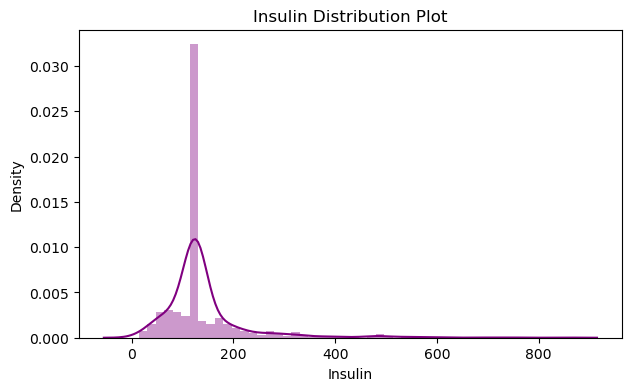

In [35]:
plt.figure(figsize=(7,4))
sns.distplot(df['Insulin'], color='Purple')
plt.title("Insulin Distribution Plot")
plt.show()

### g. BMI<a class="anchor" id="g"></a>
[Back to Table of Contents](#0.1)

C:\Users\Priyanka Pai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


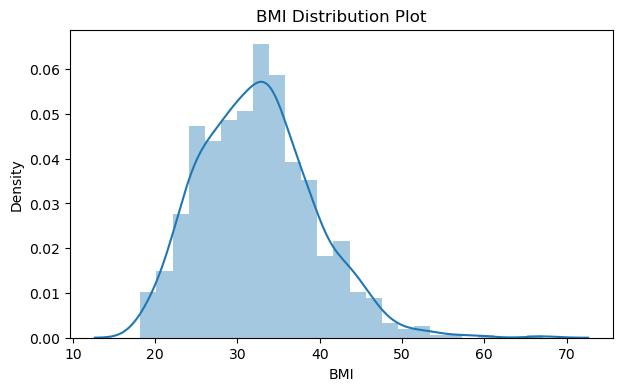

In [36]:
plt.figure(figsize=(7,4))
sns.distplot(df['BMI'])
plt.title("BMI Distribution Plot")
plt.show()

In [37]:
df.BMI.isnull().sum()

11

There are **11 missing data points** in the BMI column. From the above distribution, we can observe that the BMI data is slightly **right skewed**. So, replace the missing values with the **median** of the data.

In [38]:
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['BMI'].isnull().sum()

0

C:\Users\Priyanka Pai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


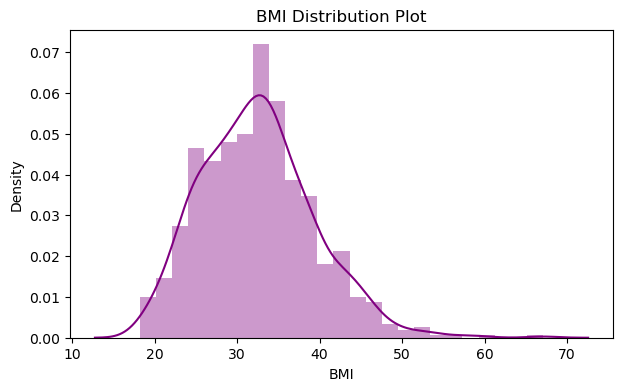

In [39]:
plt.figure(figsize=(7,4))
sns.distplot(df['BMI'], color='Purple')
plt.title("BMI Distribution Plot")
plt.show()

                 BMI_Cat      Ratio
obesity_class_1      232  30.208333
overweight           180  23.437500
obesity_class_2      148  19.270833
normal_weight        108  14.062500
obesity_class_3       96  12.500000
underweight            4   0.520833


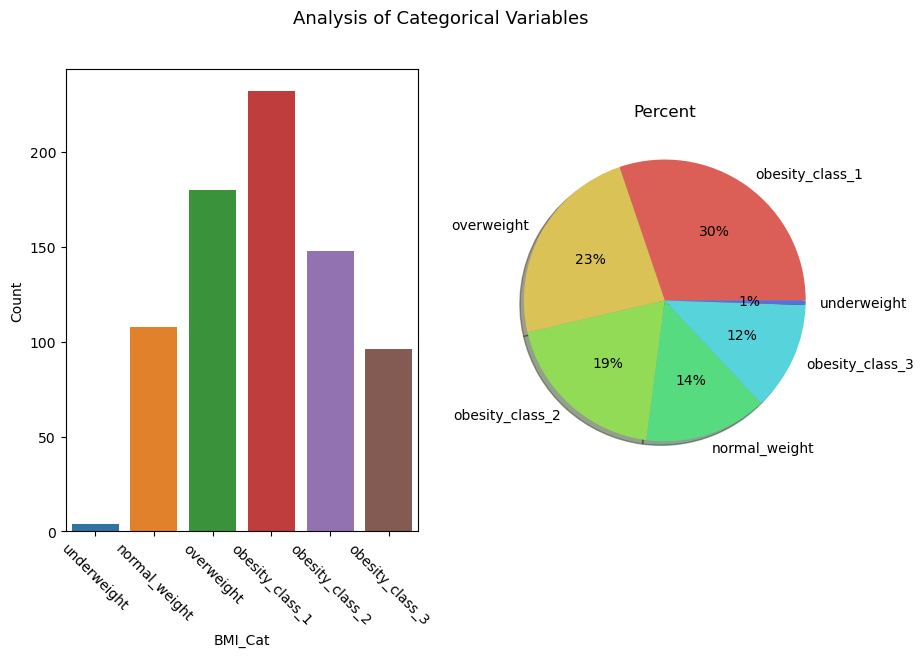

In [40]:
bmi_labels = ["underweight", "normal_weight", "overweight", "obesity_class_1", "obesity_class_2", "obesity_class_3"]
df['BMI_Cat'] = pd.cut(df['BMI'], [-1, 18.5, 25, 30, 35, 40, df['BMI'].max()], 
                       labels=bmi_labels)
cat_summary(df,"BMI_Cat", plot=True)

> Only 1% of the women were underweight. While the rest have a BMI of more than 25 kg/m^2.

### h. Diabetes Pedigree Function<a class="anchor" id="h"></a>
[Back to Table of Contents](#0.1)

C:\Users\Priyanka Pai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


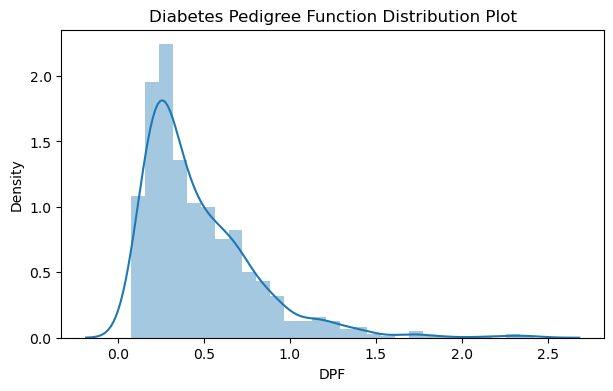

In [41]:
plt.figure(figsize=(7,4))
sns.distplot(df['DPF'])
plt.title("Diabetes Pedigree Function Distribution Plot")
plt.show()

### i. Age<a class="anchor" id="i"></a>
[Back to Table of Contents](#0.1)

C:\Users\Priyanka Pai\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


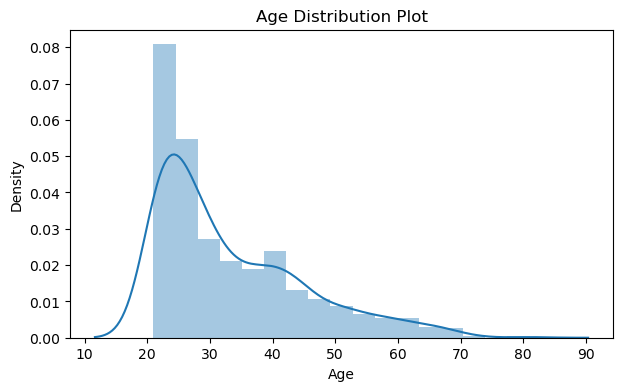

In [42]:
plt.figure(figsize=(7,4))
sns.distplot(df['Age'])
plt.title("Age Distribution Plot")
plt.show()

        New_Age_Cat      Ratio
young           396  51.562500
mature          291  37.890625
senior           81  10.546875


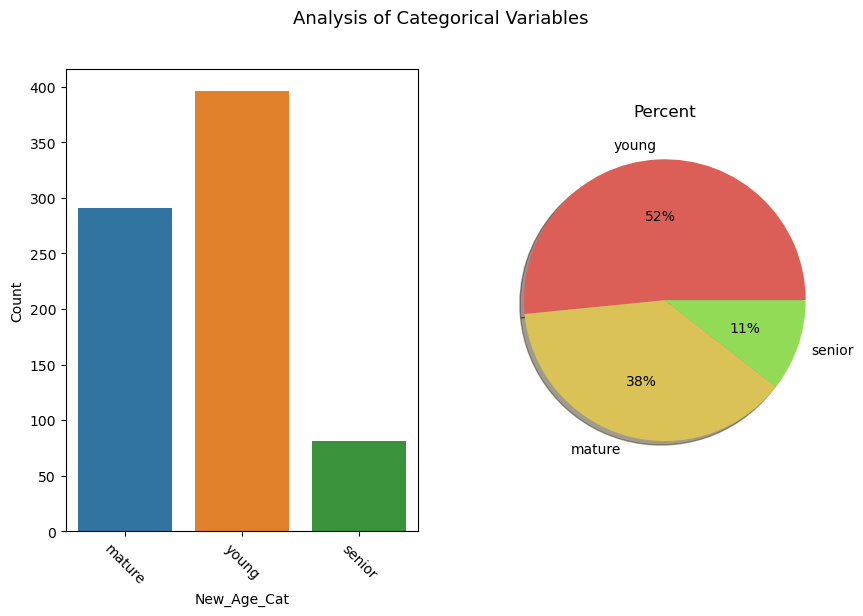

In [43]:
df["New_Age_Cat"] = df["Age"].apply(lambda x: "young" if x < 30 else ("mature" if 30 <= x <= 50 else "senior"))
cat_summary(df,"New_Age_Cat", plot=True)

> Categorized the Age column into:
>* young - below 30 years
>* mature - between 30 and 50 years
>* senior - above 50 years
>
Here, more than 50% of the women are young (aged 21 to 30 years).

### j. Correlation Plot<a class="anchor" id="j"></a>
[Back to Table of Contents](#0.1)

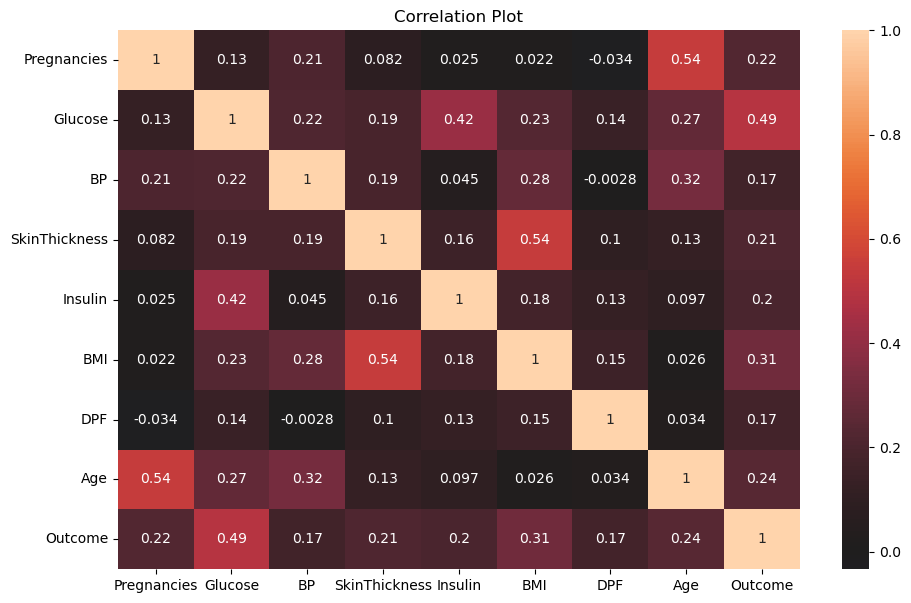

In [44]:
corr_cols = ['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age','Outcome']

plt.figure(figsize = (11,7))
sns.heatmap(df.corr(), center = 0, annot = True)
plt.title("Correlation Plot")
plt.show()

There is no multicollinearity problem in this data.

### k. Pairplot<a class="anchor" id="k"></a>
[Back to Table of Contents](#0.1)

<Figure size 1100x700 with 0 Axes>

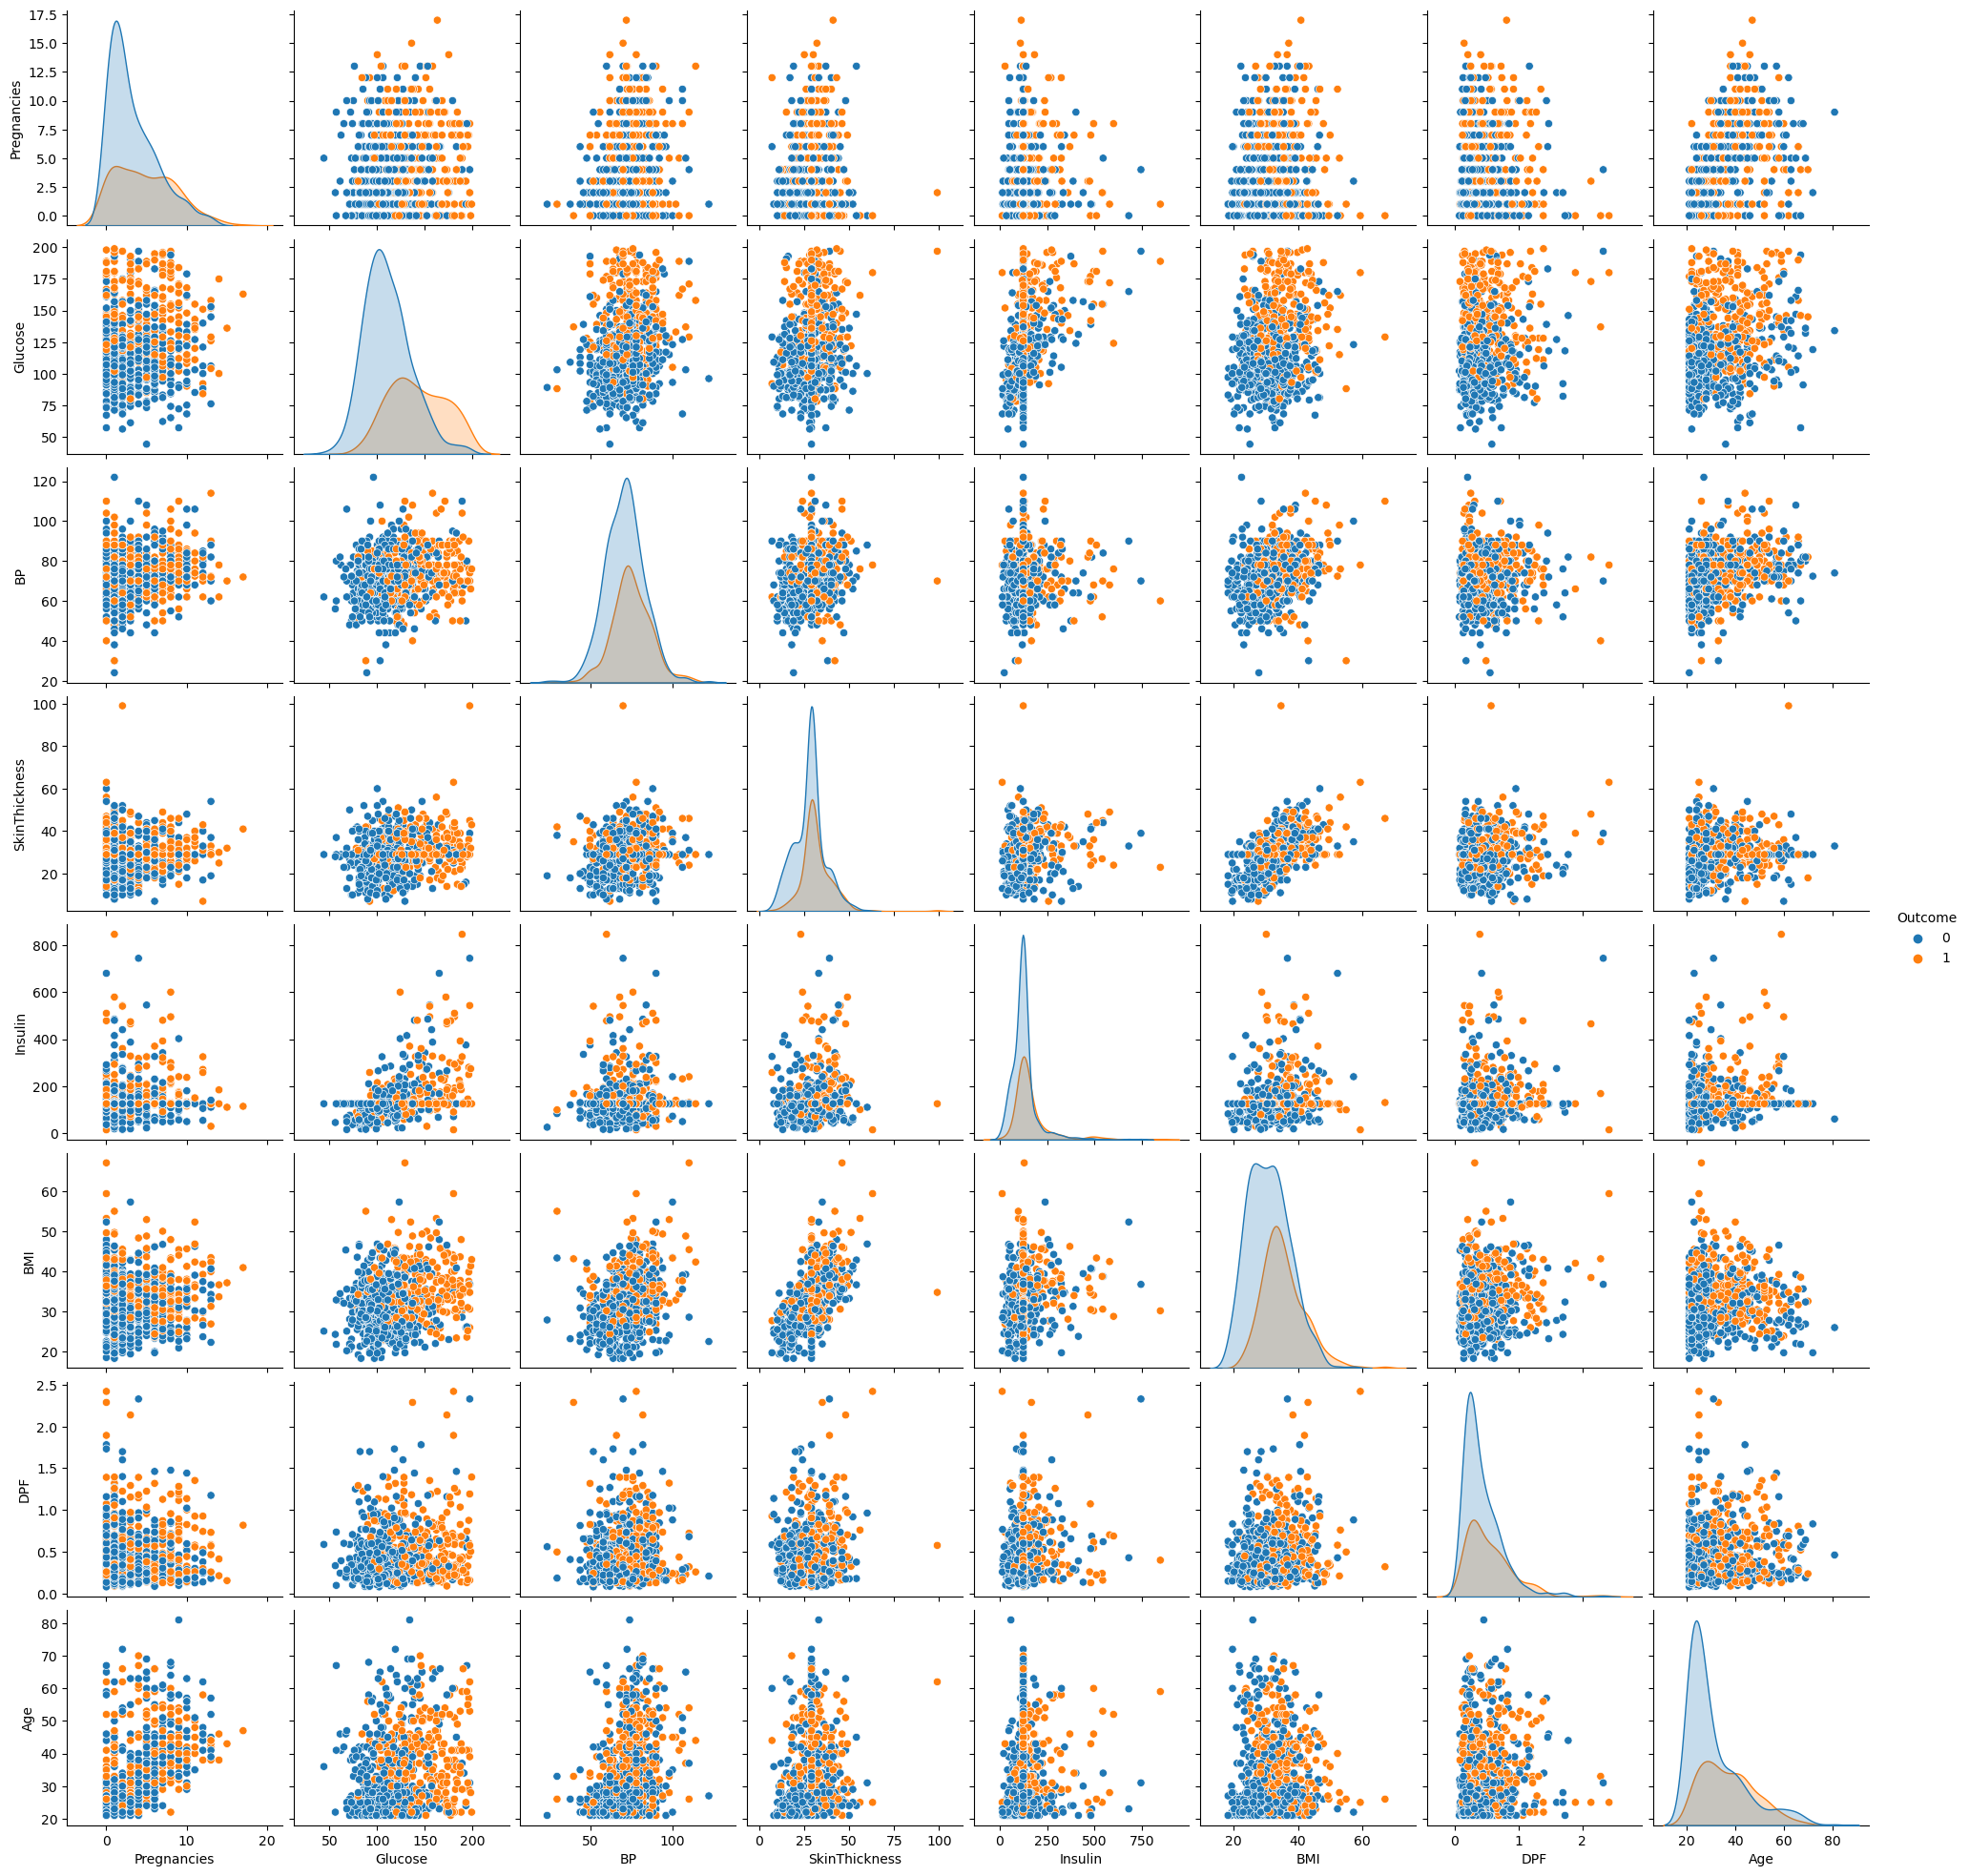

In [45]:
plt.figure(figsize = (11,7))
sns.pairplot(df, hue = "Outcome")
plt.show()

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack of relationship) between two variables.

### l. Box Plot<a class="anchor" id="l"></a>
[Back to Table of Contents](#0.1)

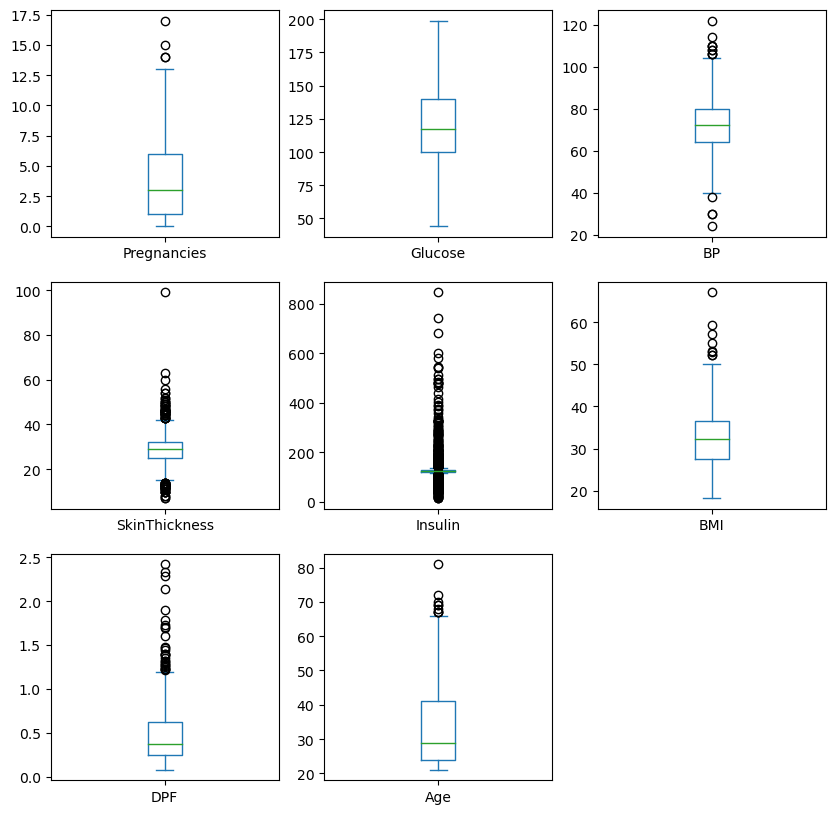

In [46]:
cols = ['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']
df[cols].plot(kind='box', subplots=True, layout=(3,3), sharex=False,sharey=False ,figsize =(10,10))
plt.show()

## 5. Modeling<a class="anchor" id="5"></a>
[Back to Table of Contents](#0.1)

In [47]:
cols = ['Pregnancies', 'Glucose', 'BP', 'SkinThickness', 'Insulin', 'BMI', 'DPF', 'Age']
X = df[cols]
y = df['Outcome']

Standardization doesn’t have any fixed minimum or maximum value. Here, the values of all the columns are scaled in such a way that they all have a **mean equal to 0 and standard deviation equal to 1**. This scaling technique works well with ***outliers***. Thus, this technique is preferred if outliers are present in the dataset.

In [48]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2, random_state=0)
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (614, 8)
Shape of X_test: (154, 8)
Shape of y_train: (614,)
Shape of y_test: (154,)


### I. Logistic Regression<a class="anchor" id="m"></a>
[Back to Table of Contents](#0.1)

Accuracy on Test Data: 81.16883116883116%
Precision Score: 0.7368421052631579
Recall Score: 0.5957446808510638
F1 Score: 0.6588235294117647

Confusion Matrix for Test Data


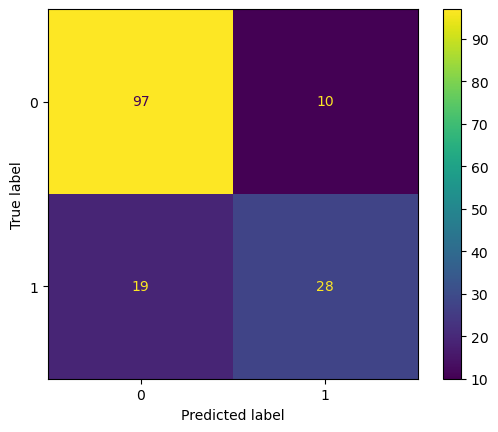

In [50]:
log_reg =LogisticRegression()
log_reg.fit(X_train, y_train)

# test data
pred_log = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, pred_log)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, pred_log)}")
print(f"Recall Score: {recall_score(y_test, pred_log)}")
print(f"F1 Score: {f1_score(y_test, pred_log)}")

cm = confusion_matrix(y_test, pred_log)
disp = ConfusionMatrixDisplay(cm)
print("\nConfusion Matrix for Test Data")
disp.plot()
plt.show()

In [51]:
log_reg.coef_

array([[ 0.32241284,  1.12868508, -0.16849537, -0.03290711, -0.12460065,
         0.65853126,  0.26593019,  0.20990982]])

In [52]:
feature_imp_log = pd.DataFrame({'Value': log_reg.coef_[0], 'Feature': X.columns}).sort_values("Value", ascending=False)
feature_imp_log

,Value,Feature
1,1.128685,Glucose
5,0.658531,BMI
0,0.322413,Pregnancies
6,0.265930,DPF
7,0.209910,Age
3,-0.032907,SkinThickness
4,-0.124601,Insulin
2,-0.168495,BP


### II. Random Forest<a class="anchor" id="n"></a>
[Back to Table of Contents](#0.1)

Accuracy on Test Data: 80.51948051948052%
Precision Score: 0.6808510638297872
Recall Score: 0.6808510638297872
F1 Score: 0.6808510638297872

Confusion Matrix for Test Data


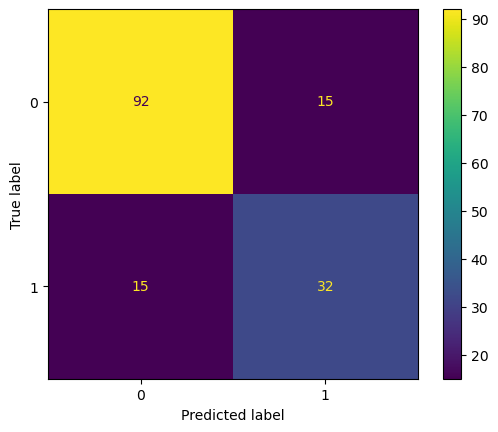

In [53]:
rf =RandomForestClassifier()
rf.fit(X_train, y_train)

# Accuray On Test Data
pred_rf = rf.predict(X_test)
accuracy = accuracy_score(y_test, pred_rf)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, pred_rf)}")
print(f"Recall Score: {recall_score(y_test, pred_rf)}")
print(f"F1 Score: {f1_score(y_test, pred_rf)}")

cm = confusion_matrix(y_test, pred_rf)
disp = ConfusionMatrixDisplay(cm)
print("\nConfusion Matrix for Test Data")
disp.plot()
plt.show()

In [54]:
feat_imp = pd.DataFrame()
feat_imp['Features'] = X.columns
feat_imp['values'] = rf.feature_importances_

feat_imp.sort_values('values', ascending=False)

,Features,values
1,Glucose,0.230337
5,BMI,0.167453
7,Age,0.139259
6,DPF,0.134605
4,Insulin,0.092003
2,BP,0.085025
0,Pregnancies,0.077721
3,SkinThickness,0.073597


### III. AdaBoost Classifier<a class="anchor" id="o"></a>
[Back to Table of Contents](#0.1)

Accuracy on Test Data: 77.27272727272727%
Precision Score: 0.6578947368421053
Recall Score: 0.5319148936170213
F1 Score: 0.5882352941176471

Confusion Matrix for Test Data


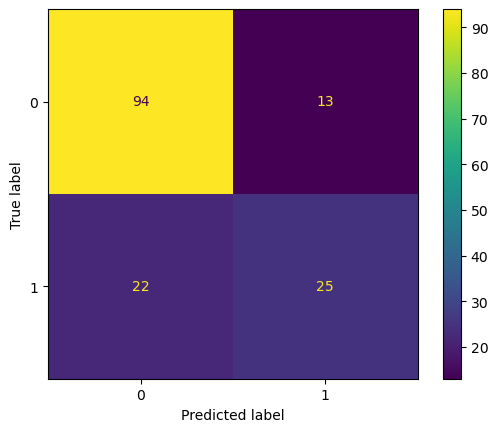

In [55]:
abc =  AdaBoostClassifier(n_estimators=50, learning_rate=0.1, random_state=0)
abc.fit(X_train, y_train)

# Accuray On Test Data
pred_ada = abc.predict(X_test)
accuracy = accuracy_score(y_test, pred_ada)
print(f"Accuracy on Test Data: {accuracy*100}%")
print(f"Precision Score: {precision_score(y_test, pred_ada)}")
print(f"Recall Score: {recall_score(y_test, pred_ada)}")
print(f"F1 Score: {f1_score(y_test, pred_ada)}")

cm = confusion_matrix(y_test, pred_ada)
disp = ConfusionMatrixDisplay(cm)
print("\nConfusion Matrix for Test Data")
disp.plot()
plt.show()

## 6. Model Comparison and Conclusion<a class="anchor" id="6"></a>
[Back to Table of Contents](#0.1)

In [56]:
model_accuracy = pd.DataFrame()
log_acc = round(accuracy_score(y_test,pred_log),4)*100
rf_acc = round(accuracy_score(y_test, pred_rf),4)*100
abc_acc = round(accuracy_score(y_test, pred_ada),4)*100

model_accuracy['Model'] = ['Logistic Regression', 'Random Forest Classifier','AdaBoost Classifier']
model_accuracy['Accuracy'] = [log_acc, rf_acc, abc_acc]

model_accuracy

,Model,Accuracy
0,Logistic Regression,81.17
1,Random Forest Classifier,80.52
2,AdaBoost Classifier,77.27



>    Logistic Regression Model out performed the other two models as the accuracy of the Logistic model is 81.17% indicating that it is a good model. 

>    81% variation in the target variable is explained by the variation in the independent variables.